In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go


In [2]:
df_Orginal= pd.read_csv('Data/1_raw2freq/maf_filteered.csv.gz', compression='gzip', sep='\t')

In [18]:
df=df_Orginal.copy()
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,country,date,rs3094315,rs6696609,rs9442372,rs4970405,rs11807848,rs2887286,rs113791678,rs3843249,...,rs12160714,rs131749,rs76610029,rs140513,rs739365,rs9616945,rs5770820,rs6010062,rs715586,rs8137951
0,Macedonia,7000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Portugal,4000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000
2,Estonia,6000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.000000,0.000000,0.500000
3,Estonia,5000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Austria,7000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hungary,4000,0.000000,0.090909,0.181818,0.181818,0.000000,0.363636,0.000000,0.181818,...,0.090909,0.454545,0.000000,0.181818,0.090909,0.090909,0.090909,0.272727,0.000000,0.000000
115,Hungary,6000,0.086957,0.086957,0.260870,0.260870,0.173913,0.173913,0.043478,0.000000,...,0.043478,0.304348,0.130435,0.304348,0.086957,0.043478,0.217391,0.086957,0.086957,0.130435
116,Hungary,5000,0.058824,0.000000,0.411765,0.000000,0.000000,0.058824,0.058824,0.058824,...,0.000000,0.117647,0.058824,0.294118,0.058824,0.058824,0.058824,0.235294,0.000000,0.117647
117,Hungary,7000,0.054054,0.081081,0.405405,0.081081,0.081081,0.108108,0.054054,0.027027,...,0.000000,0.243243,0.108108,0.270270,0.081081,0.081081,0.108108,0.108108,0.054054,0.081081


In [20]:
df_cont=df.copy()
df_cont['date'] = df_cont['date'].astype(str)
df_cont['countrydate'] = df_cont['country'] + '_' +df_cont['date']
# drop all except countrydate
df_cont.drop(df_cont.columns.difference(['countrydate']), 1, inplace=True)
df_cont

/tmp/ipykernel_32986/132245630.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cont.drop(df_cont.columns.difference(['countrydate']), 1, inplace=True)


,countrydate
0,Macedonia_7000
1,Portugal_4000
2,Estonia_6000
3,Estonia_5000
4,Austria_7000
...,...
114,Hungary_4000
115,Hungary_6000
116,Hungary_5000
117,Hungary_7000


In [7]:

def plot_silhouette_score(X, k_min=5, k_max=20):
    '''Plot the silhouette score for a range of K values
    X: The data
    k_min: The minimum number of clusters
    k_max: The maximum number of clusters   
    '''
    # Create a range of K values
    k_range = range(k_min, k_max+1)
    # Create an empty list to store the silhouette scores
    silhouette_scores = []
    # Loop through the range of K values and calculate the silhouette score for each value
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=5)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
    # Plot the silhouette scores for each K value
    plt.plot(k_range, silhouette_scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score for K-means clustering')
    plt.xticks(np.arange(k_min, k_max+1, step=2))
    plt.show()  # Show the plot in the app using st.pyplot()
    top_3 = sorted(range(len(silhouette_scores)),
                   key=lambda i: silhouette_scores[i], reverse=True)[:3]
    top_3 = [(k_min+x) for x in top_3]
    return top_3

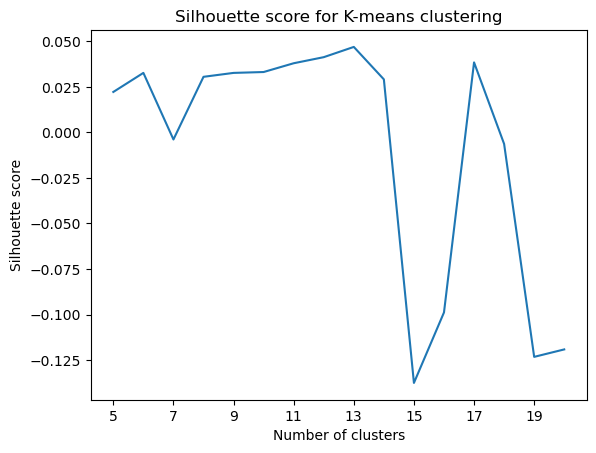

[13, 12, 17]

In [14]:
x=plot_silhouette_score(df.iloc[:, 2:])
x

In [15]:

def spectral_clustering(df3, k, country_date):
    '''Perform spectral clustering on the data
    df3: The data
    k: The number of clusters
    country_date: The country and date
    '''
    
    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(df3)
    # Perform spectral clustering
    n_clusters = k  # Number of clusters
    clustering = SpectralClustering(
        n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors", random_state=42).fit(X)    
    country_labels_S = dict(zip(country_date, clustering.labels_))
    labels = clustering.labels_
    # Visualize the clustering result
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
    ax.set_title("Spectral Clustering ({} clusters)".format(n_clusters))
    return country_labels_S, labels


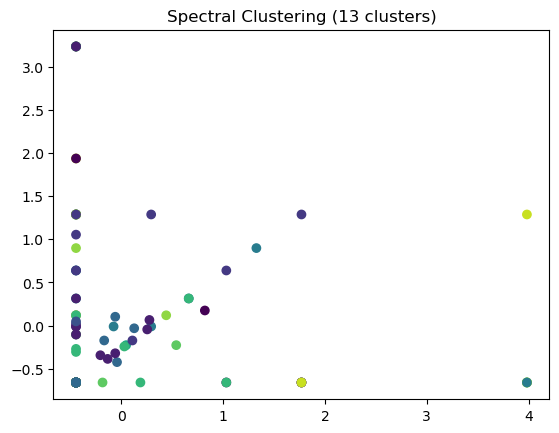

In [57]:
k=13 # number of clusters
country_labels_S, labels = spectral_clustering(df.iloc[:, 2:], k, df_cont['countrydate'])


In [58]:
def plot_country_labels(country_labels):
    ''' Plot the country labels on a map
    country_labels: The country clusters
    '''
    # Define the data for the Choropleth map
    data = go.Choropleth(
        locations=list(country_labels.keys()),  # The countries
        z=list(country_labels.values()),  # The cluster labels
        locationmode='country names',
        colorscale='Viridis',  # The color scale to use
        colorbar=dict(title='Cluster'),
    )
    # Define the layout for the map
    layout = go.Layout(
        title='',
        geo=dict(showframe=False, showcoastlines=True,
                 projection_type='equirectangular'),
        annotations=[
            dict(
                x=0.55,
                y=0.1,
                xref='paper',
                yref='paper',
                text='Annotations Here',
                showarrow=False,
            )
        ]
    )
    # Create the figure and add the Choropleth map and layout to it
    fig = go.Figure(data=data, layout=layout)
    # Display the map
    fig.show()

In [59]:
plot_country_labels(country_labels_S)

In [60]:

def umap_plot(df, country_date, labels):
    ''' Plot the UMAP projection of the data
    df: The data
    country_date: The country_date list for the annotation'''
    
    # df_umap = reducer.fit_transform(df)
    df_umap = umap.UMAP(random_state=42, 
        n_neighbors=4,
        min_dist=0.8,
        n_components=2,
        metric='canberra').fit_transform(df)
    # size of the figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Visualize the UMAP results
    plt.scatter(df_umap[:, 0], df_umap[:, 1], alpha=0.5)
    # color the points by their cluster assignment
    plt.scatter(df_umap[:, 0], df_umap[:, 1], c=labels, cmap='rainbow')
    annot2 = country_date.tolist()
    # add a annotation very small font size and close to the point
    for i, txt in enumerate(annot2):
        plt.annotate(txt, (df_umap[i, 0], df_umap[i, 1]), fontsize=8, xytext=(
            5, 2), textcoords='offset points')

     # Add a title and labels
    ax.set_title('UMAP projection of the dataset')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')

    # Display the plot 
    plt.show()


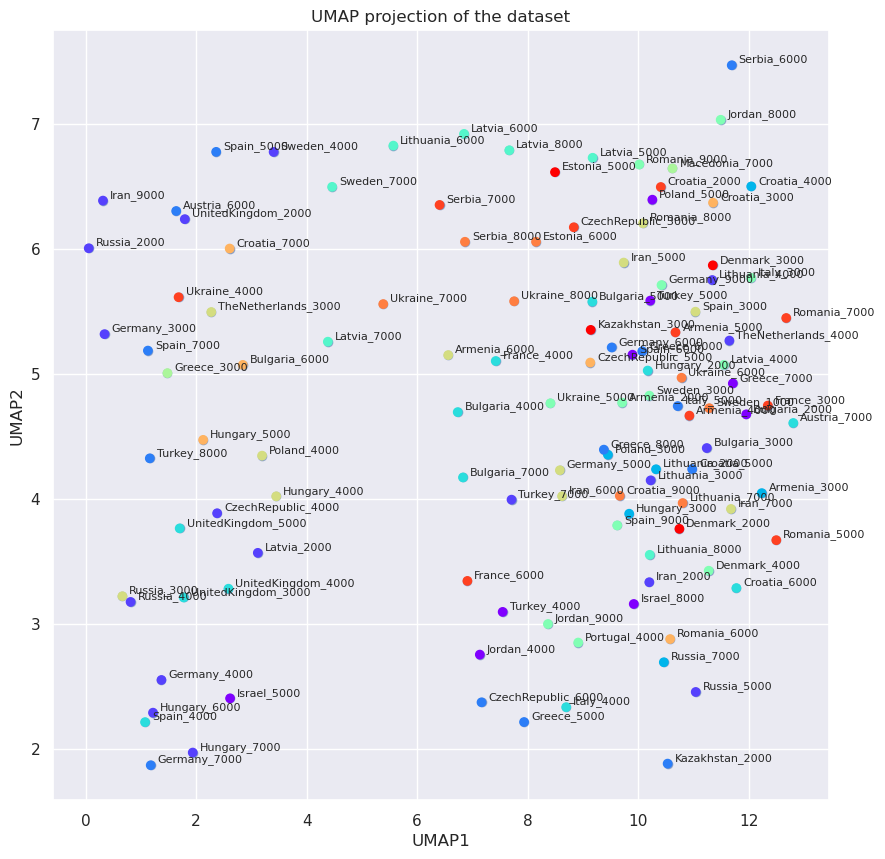

In [167]:
umap_plot(df.iloc[:, 2:], df_cont.countrydate, labels)

In [195]:

import plotly.express as px

# Load the example flights dataset and convert to long-form
# dic to df
def clusterplotting():
    df3 = pd.DataFrame.from_dict(country_labels_S, orient='index', columns=['cluster'])
    df3.reset_index(inplace=True)
    df3.rename(columns={'index': 'countrydate'}, inplace=True)
    df3['country'] = df3['countrydate'].str.split('_').str[0]
    df3['date'] = df3['countrydate'].str.split('_').str[1]
    df3['value'] = 1
# Pivot the data and create the heatmap
    clusters = df3.pivot(index='date', columns='country', values='cluster')

    fig = px.bar(df3, x='cluster', y='value', color='cluster',
             title='Countries grouped cluster', text='countrydate')
    fig.show()
    fig = px.imshow(clusters, labels=dict(
    x="Country", y="Date", color="Cluster"), )
    fig.show()

clusterplotting()



In [184]:
# import seaborn as sns

# f, ax = plt.subplots(figsize=(16, 6))
# sns.heatmap(clusters, linewidths=.5, ax=ax, cmap='plasma_r')
